Importing important libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns


Getting the DATASET

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

Converting it to DataFrame only DATA and TARGET 

In [4]:
new = pd.DataFrame(mnist['data'])  #making first DataFrame 

In [5]:
new1 = pd.DataFrame(mnist['target'],columns=['target']) #making second DataFrame 

In [6]:
new_dataframe = pd.concat([new,new1],axis=1) #concatenate two dataframes by panadas concat method

In [7]:
new_dataframe.head() #checking the dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [8]:
new_dataframe.shape #shape of the dataframe , it has 70000 rows and 785 columns

(70000, 785)

Defining my X  and y

In [9]:
X , y = mnist['data'] , mnist['target']   #selecting my X and y


In [10]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


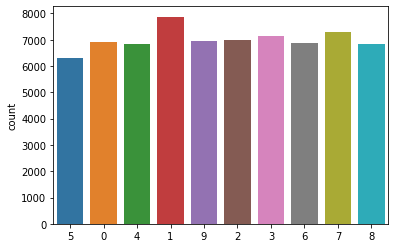

In [12]:
sns.countplot(mnist.target) #countplot for target variable

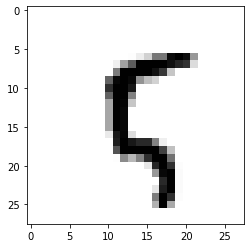

the real value is : 5


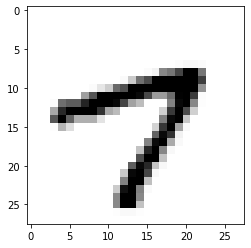

the real value is : 7


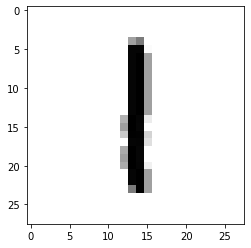

the real value is : 1


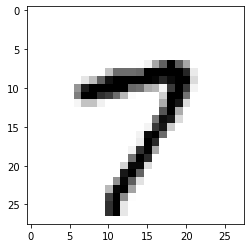

the real value is : 7


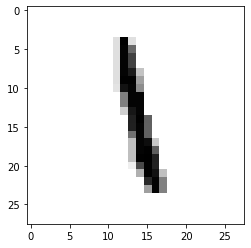

the real value is : 1


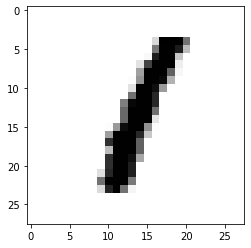

the real value is : 1


In [13]:
for i in range(100,106):  #visualization of the numbers by matplotlib
  digit = X[i]
  digit_image = digit.reshape(28,28) #the images are flatten so we have to make it 2d
  plt.imshow(digit_image , cmap=matplotlib.cm.binary)
  plt.show()
  print('the real value is :' ,mnist.target[i])



Spiliting my dataset into train test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=100) #here i have taken my test size of 0.21%

Creating a number 7 detector

In [15]:
y_train = y_train.astype(np.int8) #making y_test , y_train values integers
y_test= y_test.astype(np.int8)
y_train_7 = (y_train==7)  #creating a 7 detector
y_test_7 = (y_test==7)

In [16]:
y_train

array([6, 0, 1, ..., 2, 2, 5], dtype=int8)

In [17]:
y_train_7

array([False, False, False, ..., False, False, False])

Importing Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression  # I have used logistics regression for this project

In [19]:
model = LogisticRegression(tol=0.1)

In [20]:
model.fit(X_train , y_train_7)   #fitting the data

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

Creating a function for prediction.

In [21]:
# craeting a  function to easy visualization and predicted value
def Predict(index):
  predict_ = model.predict_proba([X[index]])
  predict =model.predict([X[index]])
  if predict ==True:
    print(f'it is 7 and probablity for 7 is :  {round(predict_[0][1],3)}% and not 7 probablity :  {round(predict_[0][0],3)}%')
    digit = X[index]
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image , cmap=matplotlib.cm.binary)
    plt.show()
  else:
    print(f'it is not 7 ,not 7 probablity :  {round(predict_[0][0],3)}%  and  7 probablity : {round(predict_[0][1],3)}% ')
    digit = X[index]
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image , cmap=matplotlib.cm.binary)
    plt.show()

it is not 7 ,not 7 probablity :  1.0%  and  7 probablity : 0.0% 


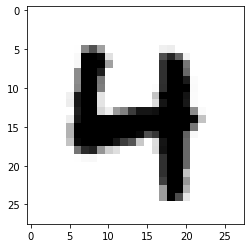

In [22]:
Predict(164) #implementing the function.

it is 7 and probablity for 7 is :  0.992% and not 7 probablity :  0.008%


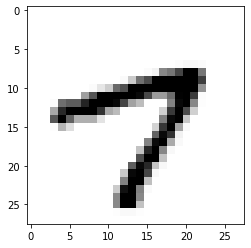

In [23]:
Predict(101)

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([False, False, False, ...,  True,  True, False])

Using Cross Val Score to get the mean accuracy

In [26]:
from sklearn.model_selection import cross_val_score
val = cross_val_score(model,X_train , y_train_7 , cv=3,scoring='accuracy')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [27]:
from sklearn.metrics import roc_auc_score 
a = roc_auc_score(y_test_7,y_pred)
print('roc_auc_score is  :',a) #area under the curve

roc_auc_score is  : 0.9609768934641868


In [28]:
b = val.mean()  #mean accuracy
print(f'accuracy : {round(a,2)}%')

accuracy : 0.96%


Ploting thr ROC curve

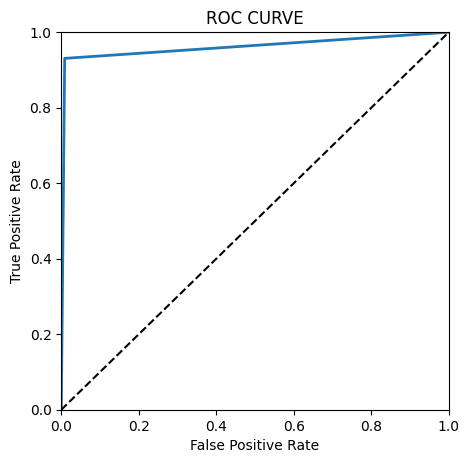

In [29]:
from sklearn.metrics import roc_curve , auc  #ploting roc_curve FALSE POSITIVE RATES vs TRUE POSITIVE RATES
logistic_fpr , logistic_tpr , threshold = roc_curve(y_test_7,y_pred) #it returns 3 varibale fpr , tpr , threshold
auc_logistic = auc(logistic_fpr , logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr , logistic_tpr , linewidth=2 , label=f'ROC curve (area ={a}')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.title('ROC CURVE')
plt.ylabel('True Positive Rate')
plt.show()


A good ROC curve means , where TRUE POSITIVE RATE is maximum and FALSE POSITIVE RATE is low. As we can in this graph ,
 the TRUE POSITIVE RATE is higher and FALSE POSITIVE RATE is very less , it means it performs very good.
  AS the area under an roc curve is a measure of the usefulness of a test , where large area means a more useful test.
   In this case the area under the curve is : 0.96

Confusion matrix and Classification report for better understanding

In [30]:
from sklearn.metrics import confusion_matrix , classification_report
print(confusion_matrix(y_test_7 , y_pred)) #confusion matrix and classification report for further checking

[[13097   116]
 [  103  1384]]


In [31]:
print(classification_report(y_test_7 , y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99     13213
        True       0.92      0.93      0.93      1487

    accuracy                           0.99     14700
   macro avg       0.96      0.96      0.96     14700
weighted avg       0.99      0.99      0.99     14700



it is not 7 ,not 7 probablity :  0.998%  and  7 probablity : 0.002% 


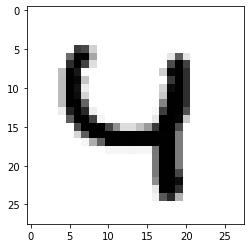

In [32]:
Predict(804)

In [33]:
lr_2 = LogisticRegression()
lr_2.fit(X_train,y_train)
y = lr_2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Images predicted as 7 with their True Labels.

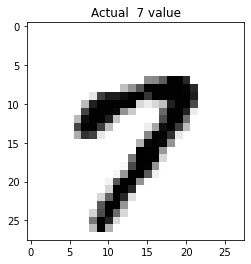

Predicted  Value  :  7


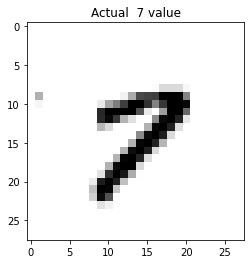

Predicted  Value  :  7


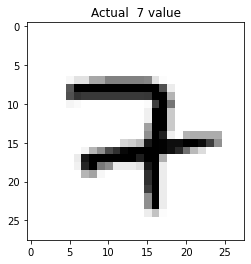

Predicted  Value  :  7


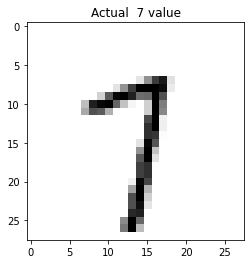

Predicted  Value  :  7


In [34]:
for i in range(1,50):   #checking actual value and model predicted value
  predict = lr_2.predict([X[i]]) 
  if predict == 7:
    digit = X[i] #####ACTUAL VALUE
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image , cmap=matplotlib.cm.binary)
    plt.title('Actual  7 value')
    plt.show()
    print(f'Predicted  Value  :  {predict[0]}')
    

Images predicted as non 7 with their True Labels.

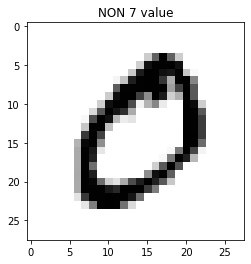

predicted  Value  :  0


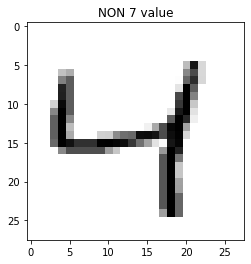

predicted  Value  :  4


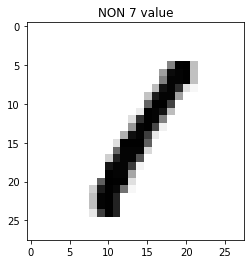

predicted  Value  :  1


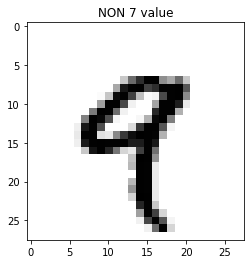

predicted  Value  :  9


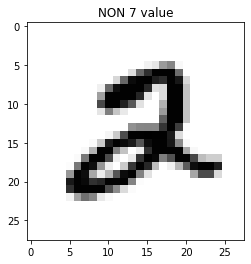

predicted  Value  :  2


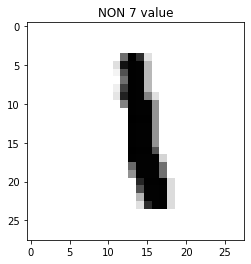

predicted  Value  :  1


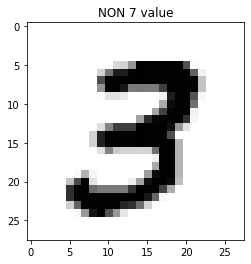

predicted  Value  :  3


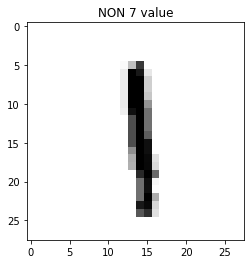

predicted  Value  :  1


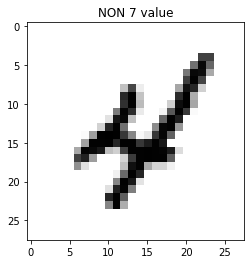

predicted  Value  :  4


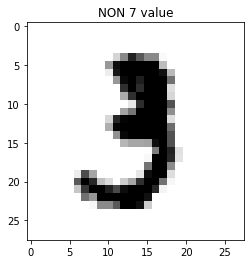

predicted  Value  :  3


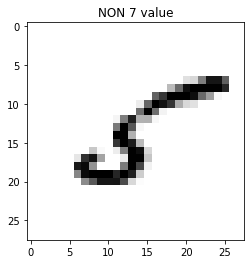

predicted  Value  :  5


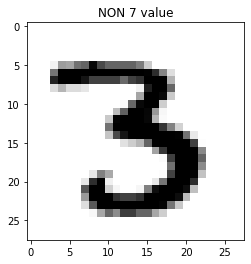

predicted  Value  :  3


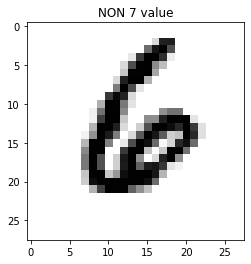

predicted  Value  :  6


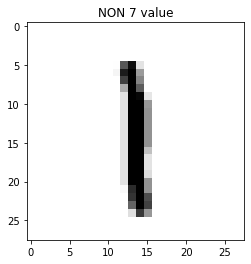

predicted  Value  :  1


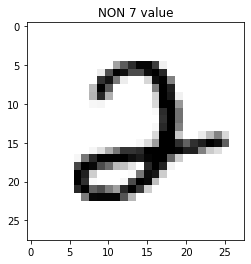

predicted  Value  :  2


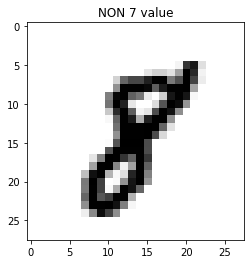

predicted  Value  :  8


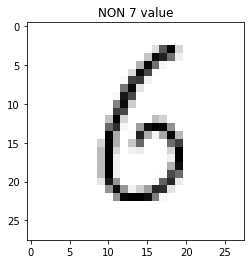

predicted  Value  :  6


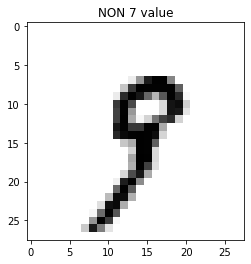

predicted  Value  :  9


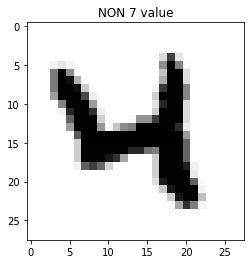

predicted  Value  :  4


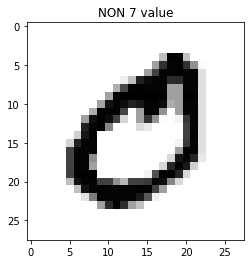

predicted  Value  :  0


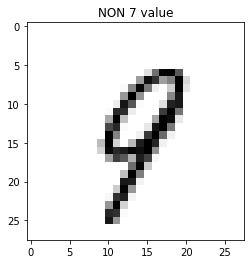

predicted  Value  :  9


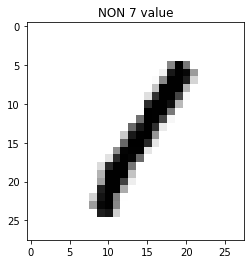

predicted  Value  :  1


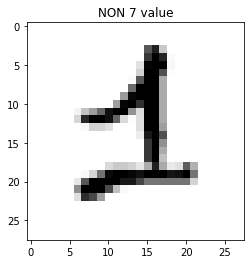

predicted  Value  :  1


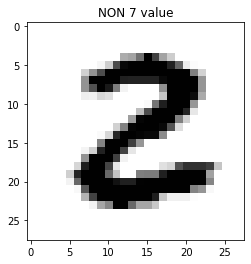

predicted  Value  :  2


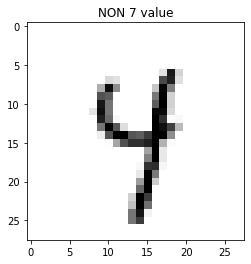

predicted  Value  :  4


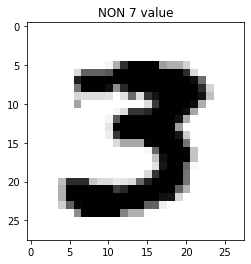

predicted  Value  :  3


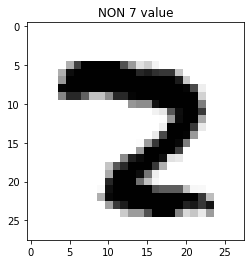

predicted  Value  :  2


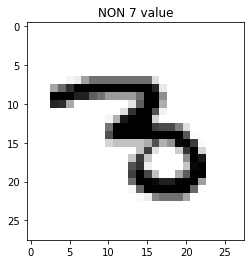

predicted  Value  :  3


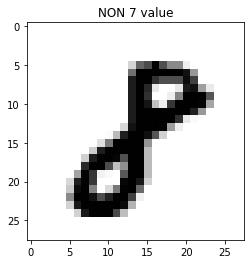

predicted  Value  :  8


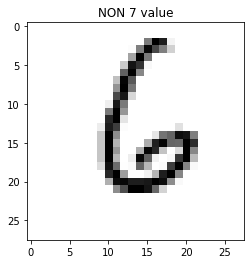

predicted  Value  :  6


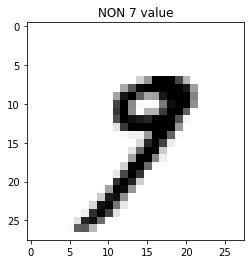

predicted  Value  :  9


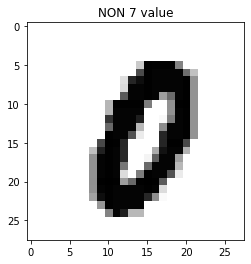

predicted  Value  :  0


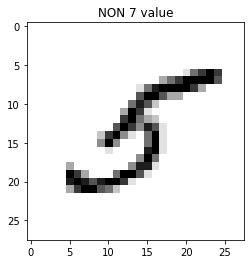

predicted  Value  :  5


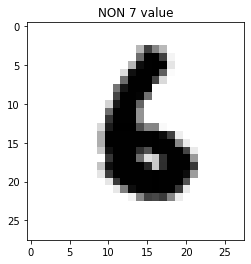

predicted  Value  :  6


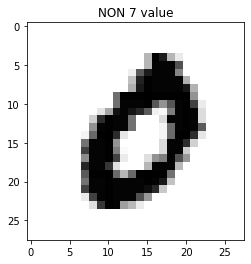

predicted  Value  :  0


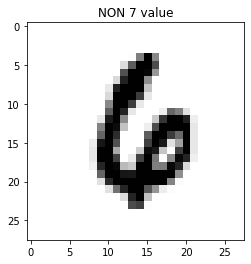

predicted  Value  :  6


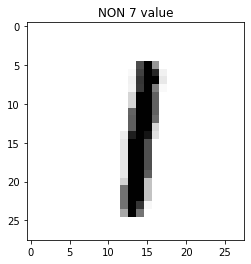

predicted  Value  :  1


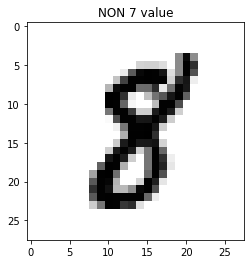

predicted  Value  :  8


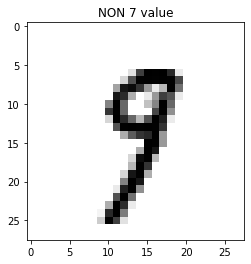

predicted  Value  :  9


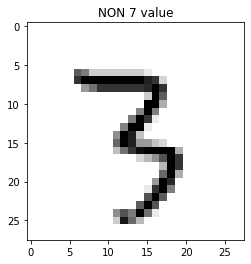

predicted  Value  :  3


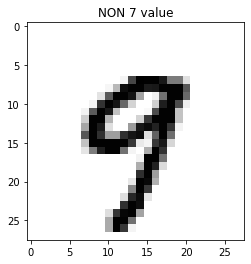

predicted  Value  :  9


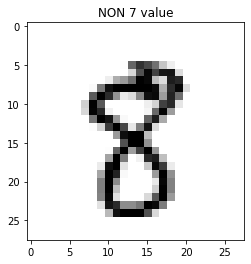

predicted  Value  :  8


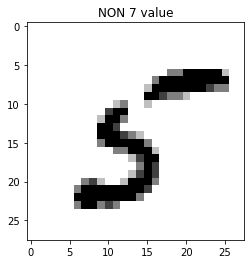

predicted  Value  :  5


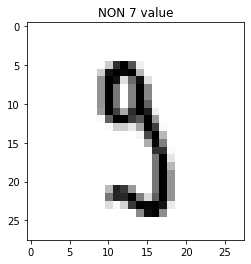

predicted  Value  :  5


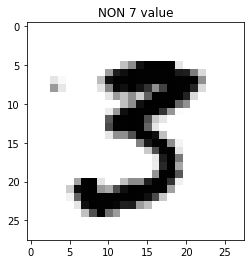

predicted  Value  :  3


In [35]:
for i in range(1,50):
  predict = lr_2.predict([X[i]]) 
  if predict != 7:
    digit = X[i] #####ACTUAL VALUE
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image , cmap=matplotlib.cm.binary)
    plt.title('NON 7 value')
    plt.show()
    print(f'predicted  Value  :  {predict[0]}')

**THANK YOU**